<a href="https://colab.research.google.com/github/ShiviV/DHL-Sentiment-and-Topic-modelling/blob/main/DHL__Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk import word_tokenize
from nltk import pos_tag
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import RegexpTokenizer
from nltk import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud
import re
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [52]:
df = pd.read_csv('Master_data.csv')

In [53]:
df.head()

,product_url,name,number_of_reviews,trust_score,website,star,email,phone,address,categories,reviewer_name,reviewer_country,reviewer_published_date,reviewer_title,reviewer_review,reviewer_rating,url,timestamp
0,https://www.trustpilot.com/review/www.dhl.com,DHL,19640.0,1.2,http://www.dhl.com,1.0,NaN,NaN,NaN,NaN,Sturzu Construct,GB,2025-03-22T01:27:28.000Z,DHL is the biggest lying package…,DHL is the biggest lying package delivery comp...,1.0,https://www.trustpilot.com/reviews/67ddf5e009d...,2025-03-22T06:34:00Z
1,https://www.trustpilot.com/review/www.dhl.com,DHL,19640.0,1.2,http://www.dhl.com,1.0,NaN,NaN,NaN,NaN,Geoffrey,GB,2025-03-21T13:44:15.000Z,Random Parcel for Norway delivered to me in UK…,Parcel for Norway delivered to UK address (us)...,2.0,https://www.trustpilot.com/reviews/67dd510f4b9...,2025-03-22T06:34:21Z
2,https://www.trustpilot.com/review/www.dhl.com,DHL,19640.0,1.2,http://www.dhl.com,1.0,NaN,NaN,NaN,NaN,Avery Smart,US,2025-03-21T15:08:41.000Z,Shittiest delivery service ever,Shittiest delivery service ever. I got a $500 ...,1.0,https://www.trustpilot.com/reviews/67dd64d9350...,2025-03-22T06:34:21Z
3,https://www.trustpilot.com/review/www.dhl.com,DHL,19640.0,1.2,http://www.dhl.com,1.0,NaN,NaN,NaN,NaN,IZ0 JUB,IT,2025-03-21T18:18:26.000Z,Driver refused to deliver to my house…,Driver refused to deliver to my house despite ...,1.0,https://www.trustpilot.com/reviews/67dd9152966...,2025-03-22T06:34:21Z
4,https://www.trustpilot.com/review/www.dhl.com,DHL,19640.0,1.2,http://www.dhl.com,1.0,NaN,NaN,NaN,NaN,David Gadd,PT,2025-03-22T01:04:40.000Z,The entire DHL experience was a…costly horrifi...,The entire DHL experience was a nightmare with...,1.0,https://www.trustpilot.com/reviews/67ddf088f40...,2025-03-22T06:34:21Z


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_url              80 non-null     object 
 1   name                     80 non-null     object 
 2   number_of_reviews        80 non-null     float64
 3   trust_score              80 non-null     float64
 4   website                  80 non-null     object 
 5   star                     80 non-null     float64
 6   email                    0 non-null      float64
 7   phone                    0 non-null      float64
 8   address                  0 non-null      float64
 9   categories               0 non-null      float64
 10  reviewer_name            80 non-null     object 
 11  reviewer_country         80 non-null     object 
 12  reviewer_published_date  80 non-null     object 
 13  reviewer_title           80 non-null     object 
 14  reviewer_review          80 

In [56]:
df.rename(columns={'reviewer_review': 'reviews'}, inplace=True)

In [57]:
df['reviews'].head(10)

,reviews
0,DHL is the biggest lying package delivery comp...
1,Parcel for Norway delivered to UK address (us)...
2,Shittiest delivery service ever. I got a $500 ...
3,Driver refused to deliver to my house despite ...
4,The entire DHL experience was a nightmare with...
5,Received TELEPHONE CALL not email saying emai...
6,"Wasn't home when tried to deliver, spoke to hi..."
7,"Worst experience, very rude and not cooperating"
8,Booked a courier for collection on Monday and ...
9,"Hey, i am completely disappointed for the deli..."


In [58]:
df['reviews'] = df['reviews'].astype(str)

In [59]:
df['r_processed'] = [reviews.lower() for reviews in df['reviews']]

In [60]:
df['reviews'].head(10)

,reviews
0,DHL is the biggest lying package delivery comp...
1,Parcel for Norway delivered to UK address (us)...
2,Shittiest delivery service ever. I got a $500 ...
3,Driver refused to deliver to my house despite ...
4,The entire DHL experience was a nightmare with...
5,Received TELEPHONE CALL not email saying emai...
6,"Wasn't home when tried to deliver, spoke to hi..."
7,"Worst experience, very rude and not cooperating"
8,Booked a courier for collection on Monday and ...
9,"Hey, i am completely disappointed for the deli..."


In [61]:
df['r_processed'][2]

'shittiest delivery service ever. i got a $500 dollar package that’s just being not delivered! and there’s is nothing they can do according to customer service. i will be getting my package today '

In [62]:
def unnecessary_words(r_processed):
  return re.sub(r'\b\w{1,2}\b', '',r_processed)
df['r_processed'] = df['r_processed'].apply(lambda x: unnecessary_words(x))
df['r_processed'].head()

,r_processed
0,dhl the biggest lying package delivery compan...
1,parcel for norway delivered address () event...
2,shittiest delivery service ever. got $500 do...
3,driver refused deliver house despite giving...
4,the entire dhl experience was nightmare with ...


In [63]:
def cleaning_repeating_char(r_processed):
  return re.sub(r'(.)1+', r'1', r_processed)
df['r_processed'] = df['r_processed'].apply(lambda x: cleaning_repeating_char(x))
df['r_processed'].head()

,r_processed
0,dhl the biggest lying package delivery compan...
1,parcel for norway delivered address () event...
2,shittiest delivery service ever. got $500 do...
3,driver refused deliver house despite giving...
4,the entire dhl experience was nightmare with ...


In [64]:
def cleaning_URLs(r_processed):
  return re.sub(r'http\S+', ' ', r_processed)
  #return re.sub('((www.[^s]+)|(https?://[^s]+))'," ",r_processed)
df['r_processed'] = df['r_processed'].apply(lambda x: cleaning_URLs(x))
df['r_processed'].head()

,r_processed
0,dhl the biggest lying package delivery compan...
1,parcel for norway delivered address () event...
2,shittiest delivery service ever. got $500 do...
3,driver refused deliver house despite giving...
4,the entire dhl experience was nightmare with ...


In [65]:
#removing HTML tags
def remove_html(r_processed):
  html=re.compile(r'<.*?>')
  return html.sub(r'', r_processed)
df['r_processed'] = df['r_processed'].apply(remove_html)

In [66]:
def remove_com(r_processed):
  return re.sub(r"\ [A-Za-z]*\.com", " ", r_processed)
df['r_processed'] = df['r_processed'].apply(lambda x: remove_com(x))
df['r_processed'].head()

,r_processed
0,dhl the biggest lying package delivery compan...
1,parcel for norway delivered address () event...
2,shittiest delivery service ever. got $500 do...
3,driver refused deliver house despite giving...
4,the entire dhl experience was nightmare with ...


In [67]:
#cleaning and removing numeric numbers
def cleaning_numbers(r_processed):
  return re.sub('[0-9]+', '', r_processed)
df['r_processed'] = df['r_processed'].apply(lambda x: cleaning_numbers(x))
df['r_processed'].head()

,r_processed
0,dhl the biggest lying package delivery compan...
1,parcel for norway delivered address () event...
2,shittiest delivery service ever. got $ dolla...
3,driver refused deliver house despite giving...
4,the entire dhl experience was nightmare with ...


In [68]:
def stripping_extra_spaces(r_processed):
  return re.sub(r' +', ' ', r_processed)
df['r_processed'] = df['r_processed'].apply(lambda x: stripping_extra_spaces(x))
df['r_processed'].head()

,r_processed
0,dhl the biggest lying package delivery company...
1,parcel for norway delivered address () eventua...
2,shittiest delivery service ever. got $ dollar ...
3,driver refused deliver house despite giving th...
4,the entire dhl experience was nightmare with v...


In [69]:
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text
df['r_processed'] = df['r_processed'].apply(clean)
df['r_processed']

,r_processed
0,dhl the biggest lying package delivery company...
1,parcel for norway delivered address eventually...
2,shittiest delivery service ever got dollar pac...
3,driver refused deliver house despite giving th...
4,the entire dhl experience was nightmare with v...
...,...
90,nan
91,nan
92,nan
93,nan


In [70]:
mydata = pd.DataFrame(df[['reviews','r_processed']])

In [71]:
 import nltk
 nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [72]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [73]:
pos_dict = {'J': wordnet.ADJ, 'V': wordnet.VERB, 'N': wordnet.NOUN, 'R': wordnet.ADV}
def token_stop_pos(tweet_processed):
  tags = pos_tag(word_tokenize(tweet_processed))
  newlist = []
  for word, tag in tags:
    if word.lower() not in set(stopwords.words('english')):
      newlist.append(tuple([word, pos_dict.get(tag[0])]))
  return newlist
mydata['pos tagged'] = mydata['r_processed'].apply(token_stop_pos)
mydata.head()

,reviews,r_processed,pos tagged
0,DHL is the biggest lying package delivery comp...,dhl the biggest lying package delivery company...,"[(dhl, v), (biggest, a), (lying, a), (package,..."
1,Parcel for Norway delivered to UK address (us)...,parcel for norway delivered address eventually...,"[(parcel, n), (norway, r), (delivered, v), (ad..."
2,Shittiest delivery service ever. I got a $500 ...,shittiest delivery service ever got dollar pac...,"[(shittiest, r), (delivery, n), (service, n), ..."
3,Driver refused to deliver to my house despite ...,driver refused deliver house despite giving th...,"[(driver, n), (refused, v), (deliver, r), (hou..."
4,The entire DHL experience was a nightmare with...,the entire dhl experience was nightmare with v...,"[(entire, a), (dhl, n), (experience, n), (nigh..."


In [74]:
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

mydata['Lemmatized_sent'] = mydata['pos tagged'].apply(lemmatize)
mydata.head()

,reviews,r_processed,pos tagged,Lemmatized_sent
0,DHL is the biggest lying package delivery comp...,dhl the biggest lying package delivery company...,"[(dhl, v), (biggest, a), (lying, a), (package,...",dhl big lying package delivery company wait ...
1,Parcel for Norway delivered to UK address (us)...,parcel for norway delivered address eventually...,"[(parcel, n), (norway, r), (delivered, v), (ad...",parcel norway deliver address eventually nea...
2,Shittiest delivery service ever. I got a $500 ...,shittiest delivery service ever got dollar pac...,"[(shittiest, r), (delivery, n), (service, n), ...",shittiest delivery service ever get dollar p...
3,Driver refused to deliver to my house despite ...,driver refused deliver house despite giving th...,"[(driver, n), (refused, v), (deliver, r), (hou...",driver refuse deliver house despite give map...
4,The entire DHL experience was a nightmare with...,the entire dhl experience was nightmare with v...,"[(entire, a), (dhl, n), (experience, n), (nigh...",entire dhl experience nightmare exception ch...


In [75]:
from textblob import TextBlob

# function to calculate subjectivity
def getSubjectivity(r_processed):
    return TextBlob(r_processed).sentiment.subjectivity

# function to calculate polarity
def getPolarity(r_processed):
    return TextBlob(r_processed).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score <= 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [76]:
mydata['Polarity'] = mydata['Lemmatized_sent'].apply(getPolarity)
mydata['Analysis'] = mydata['Polarity'].apply(analysis)
mydata.head()

,reviews,r_processed,pos tagged,Lemmatized_sent,Polarity,Analysis
0,DHL is the biggest lying package delivery comp...,dhl the biggest lying package delivery company...,"[(dhl, v), (biggest, a), (lying, a), (package,...",dhl big lying package delivery company wait ...,-0.304167,Negative
1,Parcel for Norway delivered to UK address (us)...,parcel for norway delivered address eventually...,"[(parcel, n), (norway, r), (delivered, v), (ad...",parcel norway deliver address eventually nea...,0.108333,Positive
2,Shittiest delivery service ever. I got a $500 ...,shittiest delivery service ever got dollar pac...,"[(shittiest, r), (delivery, n), (service, n), ...",shittiest delivery service ever get dollar p...,0.000000,Negative
3,Driver refused to deliver to my house despite ...,driver refused deliver house despite giving th...,"[(driver, n), (refused, v), (deliver, r), (hou...",driver refuse deliver house despite give map...,-0.450000,Negative
4,The entire DHL experience was a nightmare with...,the entire dhl experience was nightmare with v...,"[(entire, a), (dhl, n), (experience, n), (nigh...",entire dhl experience nightmare exception ch...,0.133333,Positive


In [77]:
tb_counts = mydata.Analysis.value_counts()
tb_counts

,count
Analysis,
Negative,71
Positive,24


([<matplotlib.patches.Wedge at 0x7a11081cf9d0>,
 [Text(-0.7713604253723, 0.7842213298358217, 'Negative'),
  Text(0.7713603069581648, -0.7842214463079966, 'Positive')],
 [Text(-0.42074205020307265, 0.4277570890013572, '74.7%'),
  Text(0.4207419856135444, -0.4277571525316345, '25.3%')])

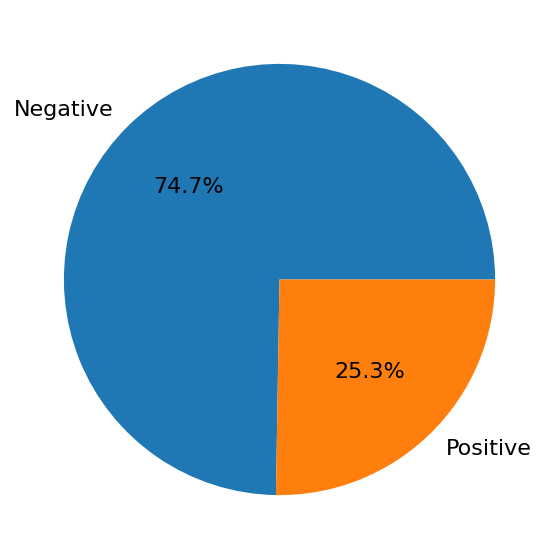

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= mydata.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, autopct='%1.1f%%', shadow=False)
# plt.legend()

In [79]:
!pip install vaderSentiment

In [80]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment
def vadersentimentanalysis(r_processed):
    vs = analyzer.polarity_scores(r_processed)
    return vs['compound']
mydata['Vader Sentiment'] = mydata['Lemmatized_sent'].apply(vadersentimentanalysis)

In [81]:
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
mydata['Vader_Analysis'] = mydata['Vader Sentiment'].apply(vader_analysis)
mydata.head()

,reviews,r_processed,pos tagged,Lemmatized_sent,Polarity,Analysis,Vader Sentiment,Vader_Analysis
0,DHL is the biggest lying package delivery comp...,dhl the biggest lying package delivery company...,"[(dhl, v), (biggest, a), (lying, a), (package,...",dhl big lying package delivery company wait ...,-0.304167,Negative,-0.8807,Negative
1,Parcel for Norway delivered to UK address (us)...,parcel for norway delivered address eventually...,"[(parcel, n), (norway, r), (delivered, v), (ad...",parcel norway deliver address eventually nea...,0.108333,Positive,-0.4588,Neutral
2,Shittiest delivery service ever. I got a $500 ...,shittiest delivery service ever got dollar pac...,"[(shittiest, r), (delivery, n), (service, n), ...",shittiest delivery service ever get dollar p...,0.000000,Negative,-0.6597,Negative
3,Driver refused to deliver to my house despite ...,driver refused deliver house despite giving th...,"[(driver, n), (refused, v), (deliver, r), (hou...",driver refuse deliver house despite give map...,-0.450000,Negative,-0.6124,Negative
4,The entire DHL experience was a nightmare with...,the entire dhl experience was nightmare with v...,"[(entire, a), (dhl, n), (experience, n), (nigh...",entire dhl experience nightmare exception ch...,0.133333,Positive,0.8913,Positive


In [82]:
#count of sentiments with Neutral sentiment being considered
vader_counts = mydata['Vader_Analysis'].value_counts()
vader_counts

,count
Vader_Analysis,
Neutral,45
Negative,40
Positive,10


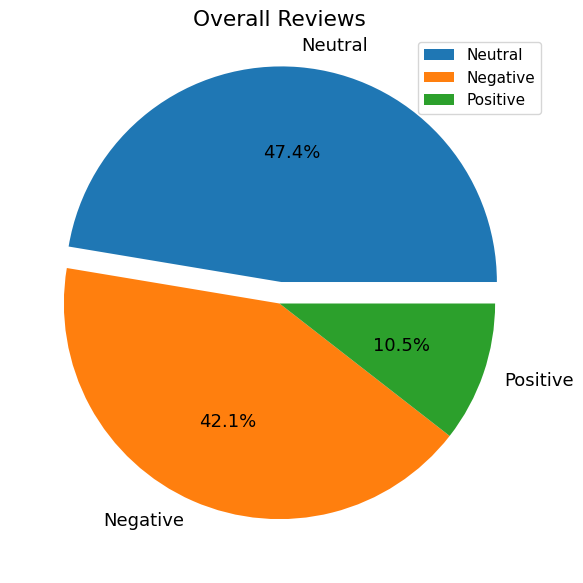

In [83]:
vader_counts= mydata['Vader_Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.rcParams['font.size'] = '13'
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)
plt.title("Overall Reviews")
plt.legend(fontsize = 11)

In [84]:
from wordcloud import WordCloud, ImageColorGenerator

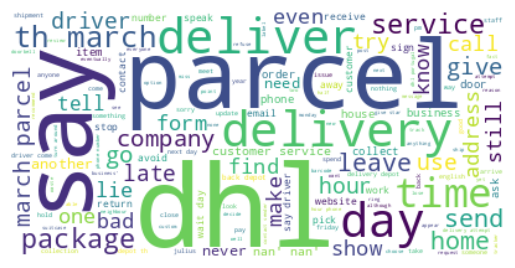

In [85]:
def create_wordcloud(text):
  wc = WordCloud(background_color = 'white', max_words=3000, repeat=False)
  wc.generate(str(text))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis('off')
  plt.show()
create_wordcloud(mydata['Lemmatized_sent'].values)

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
countVectorizer = CountVectorizer()
countVector = countVectorizer.fit_transform(mydata['Lemmatized_sent'])
print('{} Number of tweets have {} words'.format(countVector.shape[0], countVector.shape[1]))


count_vect_df = pd.DataFrame(countVector.toarray(), columns = countVectorizer.get_feature_names_out())
count_vect_df

95 Number of tweets have 690 words


,able,abouthr,absolute,absolutely,accept,access,accord,account,add,address,...,work,working,would,wrap,write,wrong,year,yell,yet,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
counts = pd.DataFrame(count_vect_df.sum())
count_df = counts.sort_values(0, ascending = False).head(20)
count_df

,0
dhl,82
delivery,72
parcel,68
day,64
say,62
service,52
deliver,50
march,40
driver,40
would,38


Text(0.5, 1.0, '20 Most frequently used words')

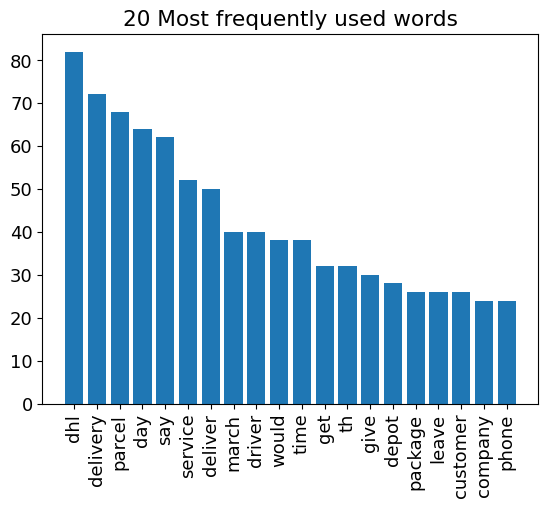

In [88]:
ind = count_df.index
val = [item for sublist in count_df.values for item in sublist]
plt.bar(ind, val)
plt.xticks(rotation=90)
plt.title('20 Most frequently used words')

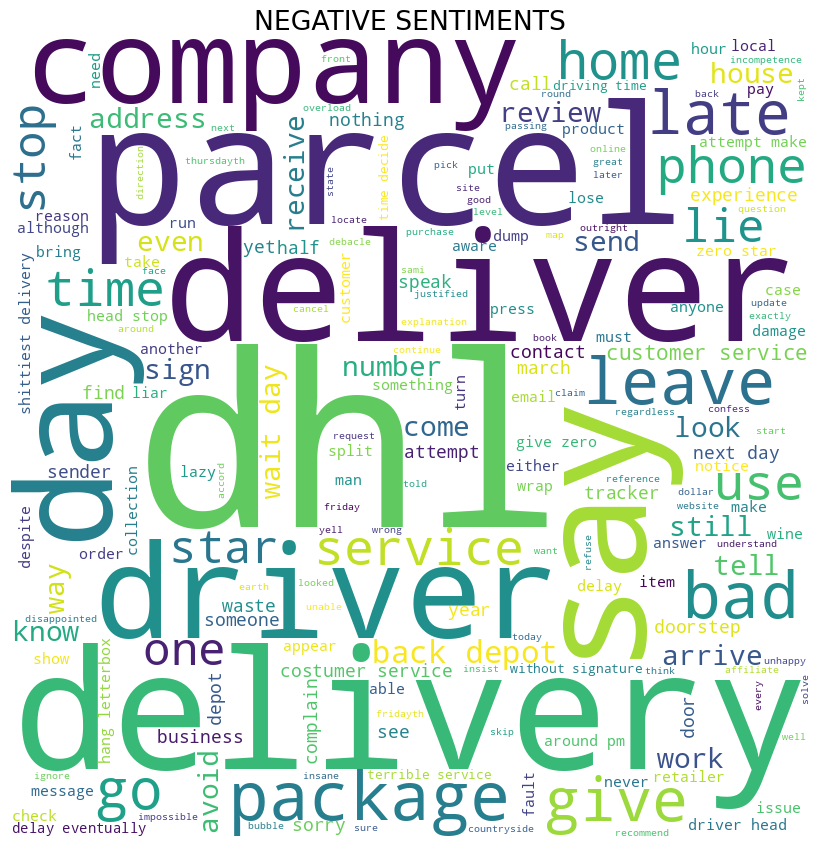

In [89]:
word_cloud_df = mydata.loc[mydata['Vader_Analysis'] == 'Negative', :]
all_words = ' '.join([text for text in word_cloud_df['Lemmatized_sent']])

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_words)

plt.figure(figsize=(8,8), facecolor=None)
plt.rcParams['font.size'] = '16'
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('NEGATIVE SENTIMENTS')
plt.show()

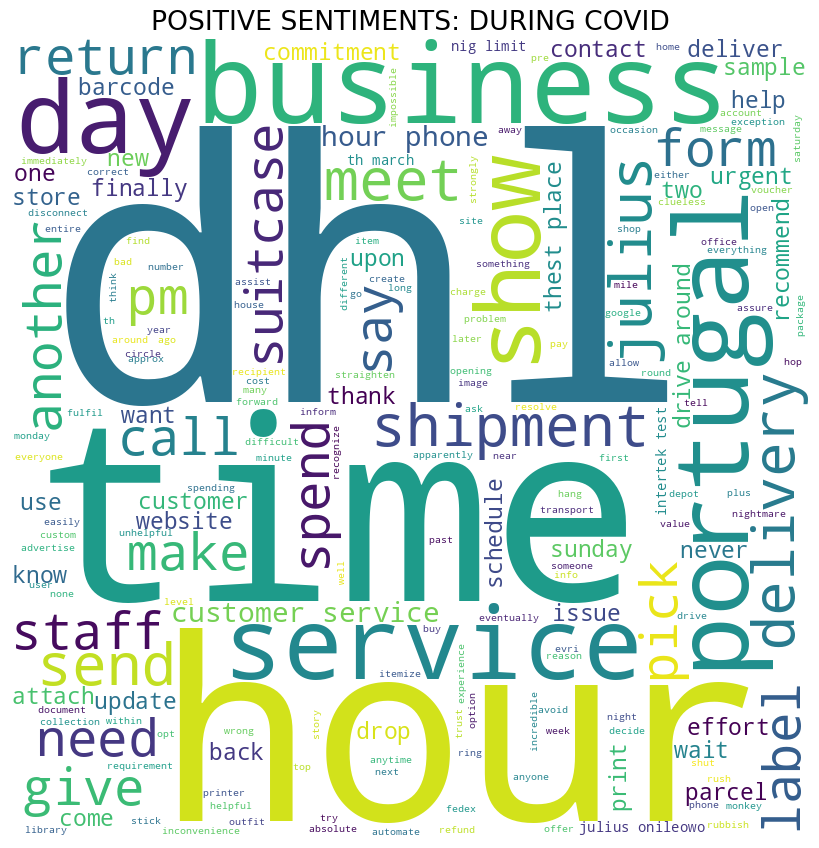

In [90]:
word_cloud_df1 = mydata.loc[mydata['Vader_Analysis'] == 'Positive', :]
all_words = ' '.join([text for text in word_cloud_df1['Lemmatized_sent']])

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_words)

plt.figure(figsize=(8,8), facecolor=None)
plt.rcParams['font.size'] = '16'
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('POSITIVE SENTIMENTS: DURING COVID')
plt.show()

In [91]:
from nltk.util import ngrams
#tokens = mydata['Lemmatized_sent'].str.split()
#sequences = [tokens[i:] for i in range(3)]
#bigrams = zip(*sequences)
n_grams = ngrams(mydata['Lemmatized_sent'].str.split(), 3)
for grams in n_grams:
    print(grams)

#output = list(ngrams(mydata['Lemmatized_sent'], 5))
#print(output)

(['dhl', 'big', 'lying', 'package', 'delivery', 'company', 'wait', 'day', 'sami', 'bring', 'package', 'put', 'front', 'door', 'leave', 'one', 'home', 'understand', 'someone', 'passing', 'take', 'leave', 'get', 'message', 'dhl', 'tell', 'receive', 'package', 'dhl', 'mean', 'dangerous', 'hooligan', 'liar', 'recommend', 'company', 'anyone', 'look', 'customer', 'review'], ['parcel', 'norway', 'deliver', 'address', 'eventually', 'nearly', 'hour', 'try', 'get', 'right', 'department', 'dhl', 'least', 'separate', 'bit', 'dhl', 'apparently', 'refuse', 'contact', 'one', 'another', 'phone', 'number', 'give', 'robot', 'chat', 'work', 'form', 'website', 'go', 'loop', 'chat', 'box', 'person', 'tell', 'destroy', 'parcel', 'eventually', 'find', 'human', 'another', 'number', 'pleasant', 'woman', 'sound', 'embarrassed', 'working', 'suppose', 'survey', 'end', 'phone', 'call', 'lie', 'cut', 'certainly', 'send', 'anything', 'sham', 'outfit'], ['shittiest', 'delivery', 'service', 'ever', 'get', 'dollar', 'p

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [93]:
tfidf = TfidfVectorizer(max_features=2500)
X = tfidf.fit_transform(mydata.Lemmatized_sent).toarray()
y = mydata.Vader_Analysis.map({'Positive': 1, 'Neutral': 0, 'Negative':-1}).values
featureNames = tfidf.get_feature_names_out()


In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

In [95]:
X_train.shape, X_test.shape

((76, 690), (19, 690))

In [96]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

## Testing the model on test set
y_pred = classifier.predict(X_test)
y_pred

array([-1, -1,  0, -1, -1,  0,  0,  0,  0, -1,  0, -1,  1,  0,  0,  0,  0,
        0, -1])

In [97]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )

[[7 2 0]
 [0 9 0]
 [0 0 1]]
The model accuracy is 0.8947368421052632


Confusion Matrix:
 [[7 2 0]
 [0 9 0]
 [0 0 1]]
The model accuracy is 0.8947368421052632

Classification Report:
               precision    recall  f1-score   support

          -1       1.00      0.78      0.88         9
           0       0.82      1.00      0.90         9
           1       1.00      1.00      1.00         1

    accuracy                           0.89        19
   macro avg       0.94      0.93      0.92        19
weighted avg       0.91      0.89      0.89        19

Matthews Correlation Coefficient (MCC): 0.8249
Cohen’s Kappa: 0.8081


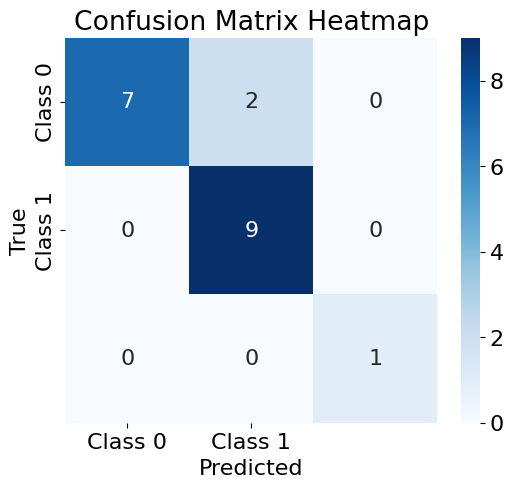

In [98]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, matthews_corrcoef, cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are already defined (true labels and predicted labels)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix and accuracy
print("Confusion Matrix:\n", cm)
print("The model accuracy is", accuracy)

# Print classification report for precision, recall, and f1-score
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Compute Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

# Compute Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen’s Kappa: {kappa:.4f}")

# ROC Curve and AUC (if y_pred_proba is available, i.e., predicted probabilities)
# Uncomment below lines if you have predicted probabilities (for binary classification)
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# roc_auc = auc(fpr, tpr)
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc='lower right')
# plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()



The rows represent the true labels, and the columns represent the predicted labels.

Class -1: 7 correct predictions and 2 incorrect ones (predicted as class 0).

Class 0: 9 correct predictions, and there are no misclassifications for this class.

Class 1: 1 correct prediction with no misclassification.


The model has an accuracy of about 89.5%, which is a good indicator of how often the model is correct across all classes.




There can be a chance of overfitting also


In [99]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 15)
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

1.0

In [100]:
featureImportance = pd.DataFrame({i : j for i,j in zip(dt.feature_importances_,featureNames)}.items(),columns = ['Importance','word'])
featureImportance.sort_values(by='Importance',ascending=False)

#plt.bar([x for x in range(len(featureImportance))], featureImportance)
#plt.show()

,Importance,word
8,0.208146,would
1,0.185537,bad
3,0.180363,dhl
5,0.140004,leave
6,0.098472,service
2,0.091639,day
7,0.053054,update
4,0.042786,dollar
0,0.000000,zero
